<a href="https://colab.research.google.com/github/iqbal-fadhil/tugas-matrikulasi-pemrograman-python-p/blob/master/Tugas_Kelompok_Kelas_Matrikulasi_Pemrograman_Python_(P).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kelompok Kelas Matrikulasi-Pemrograman Python (P)**
1. Devita Dwitama Putri Baron [6025241052]
2. Alit Fajar Kurniawan [6025241046]
3. Teddy Surianto [6025241022]
4. Iqbal Fadhil [6025241009]
5. Karim [6025241041]
6. Arijal Ibnu Jati [6025241044]

#**TUJUAN PROGRAM**

1. Grafik penjualan dari tahun ke tahun (rupiah) - Mas Karim
2. 10 Produk dengan penjualan tertinggi (quantity) - Mas Arijal
3. 10 Negara dengan penjualan tertinggi (rupiah) - Mas Alit
4. 10 Bulan dengan penjualan tertinggi (rupiah) - Mas Teddy
5. 10 Customer dengan jumlah transaksi pembelian terbanyak sepanjang data (jumlah invoice) -Devita
6. 10 Customer dengan nilai transaksi pembelian terbanyak sepanjang data (rupiah) - Mas Iqbal

#**INSTALL gdown**

In [ ]:
!pip install gdown

#**INSTALL openpyxl**

In [ ]:
!pip install openpyxl

#**INSTALL seaborn**

In [ ]:
!pip install seaborn

In [ ]:
import gdown
import pandas as pd
from openpyxl import load_workbook
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
file_id = "1rCzzRlQ6TRIdxK6ysngcDl2KuuKkKML3"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "online_retail_II.xlsx"
gdown.download(download_url, output_file, quiet=False)

file_path = 'online_retail_II.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1rCzzRlQ6TRIdxK6ysngcDl2KuuKkKML3
To: /content/online_retail_II.xlsx
100%|██████████| 45.6M/45.6M [00:00<00:00, 67.5MB/s]


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [ ]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


#**DEVITA**

##10 Customer dengan jumlah transaksi pembelian terbanyak sepanjang data (jumlah invoice)


**Step 1 : Melakukan unique id invoice pada setiap ID CUSTOMER**


In [ ]:
InvoiceCustomer = df.groupby('Customer ID')['Invoice'].unique().reset_index()
InvoiceCustomer.columns=['ID CUSTOMER', 'LIST INVOICE']
InvoiceCustomer.head()

,ID CUSTOMER,LIST INVOICE
0,12346.0,"[491725, 491742, 491744, 492718, 492722, 49341..."
1,12347.0,"[529924, 537626]"
2,12348.0,[524140]
3,12349.0,"[C490283, 506394, 508728, 529344]"
4,12351.0,[536012]


**Step 2 : Melakukan hitung nilai dari id invoice unique yang telah dilakukan pada step sebelumnya**


In [ ]:
InvoiceCustomer = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
InvoiceCustomer.columns=['ID CUSTOMER', 'JUMLAH INVOICE']
InvoiceCustomer.head()

,ID CUSTOMER,JUMLAH INVOICE
0,12346.0,15
1,12347.0,2
2,12348.0,1
3,12349.0,4
4,12351.0,1


**Step 3 : Menentukan top 10 berdasarkan pembelian terbanyak(sorting desending)**

In [ ]:
Top10 = InvoiceCustomer.sort_values(by='JUMLAH INVOICE', ascending=0).head(10)
Top10

,ID CUSTOMER,JUMLAH INVOICE
1869,14911.0,270
254,12748.0,159
4065,17850.0,158
2165,15311.0,158
1291,14156.0,138
1631,14606.0,135
511,13089.0,132
4058,17841.0,126
1570,14527.0,108
957,13694.0,105


**Step 4 : Visualisasi data yang telah di sorting menggunakan bar chart**

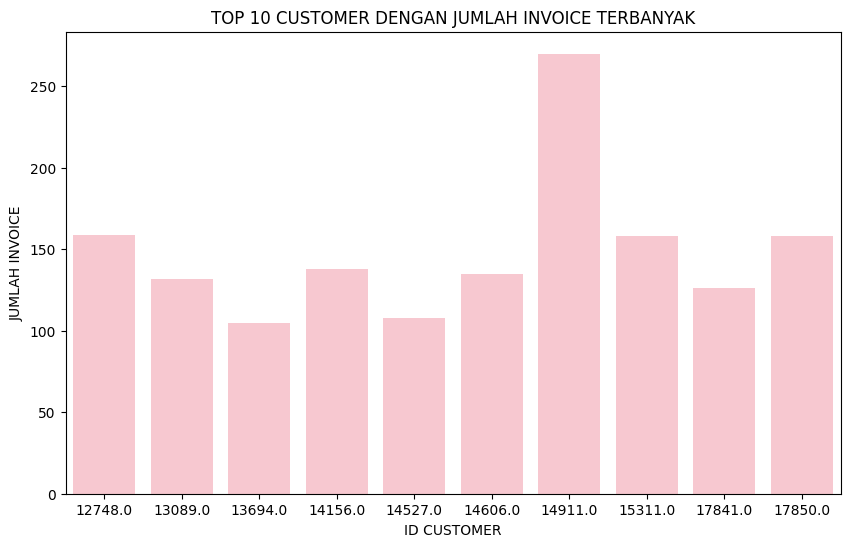

In [ ]:
plt.figure(figsize=(10,6))
plt.title("TOP 10 CUSTOMER DENGAN JUMLAH INVOICE TERBANYAK")
sb.barplot(x='ID CUSTOMER', y='JUMLAH INVOICE', data=Top10, color='pink')
plt.show()

##**TERIMAKASIH**

# **TEDDY**

##10 Bulan dengan penjualan tertinggi (rupiah)

EX 1 : Penjualan Tertinggi dalam Rupiah

In [ ]:
#STEP 1 : Membaca data dari file Excel
file_path = 'online_retail_II.xlsx'
df = pd.read_excel(file_path)
#STEP 2 : Membersihkan data
df.dropna(subset=['InvoiceDate', 'Quantity', 'Price'], inplace=True)
df['Total'] = df['Quantity'] * df['Price']
#STEP 3 : Mengonversi tanggal ke format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#STEP 4 : Mengelompokkan data berdasarkan bulan dan tahun
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('MonthYear')['Total'].sum().reset_index()
#STEP 5 : Mengurutkan data berdasarkan total penjualan
top_10_months = monthly_sales.sort_values(by='Total', ascending=False).head(10)
#STEP 6 : Menampilkan hasil
print(top_10_months)

   MonthYear        Total
11   2010-11  1422654.642
10   2010-10  1045168.350
9    2010-09   853650.431
0    2009-12   799847.110
3    2010-03   765848.761
6    2010-06   679786.610
8    2010-08   656776.340
1    2010-01   624032.892
5    2010-05   615322.830
4    2010-04   590580.432


EX 2 : Kuantitas Penjualan Tertinggi

In [ ]:
import pandas as pd

def top_10_months(data):
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

    monthly_sales = data.groupby('YearMonth')['Quantity'].sum()

    top_10 = monthly_sales.sort_values(ascending=False).head(10)

    return top_10

data = pd.read_excel('online_retail_II.xlsx')
top_10_months(data)

,Quantity
YearMonth,
2010-11,673856
2010-10,601729
2010-03,489370
2010-09,478262
2010-08,451803
2009-12,420088
2010-06,388253
2010-01,375363
2010-02,368402


EX 3 : Visualisasi Data

<ipython-input-13-4181dfe92d89>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index.astype(str), y=top_10.values, palette='viridis')


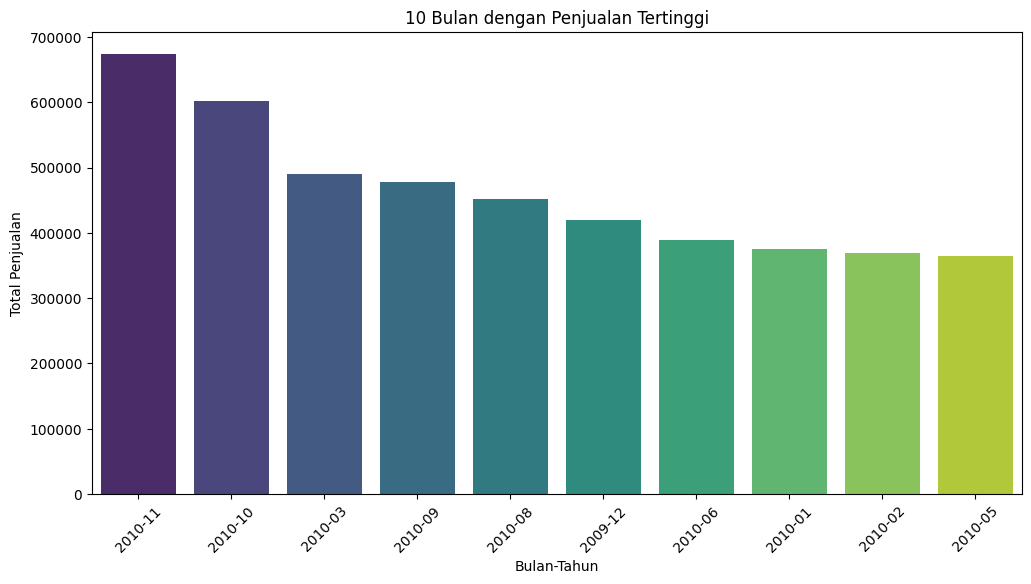

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def top_10_bulan(data):
    # Pastikan kolom 'InvoiceDate' dalam format datetime
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

    # Ekstrak tahun dan bulan dari kolom 'InvoiceDate'
    data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

    # Kelompokkan berdasarkan 'YearMonth' dan jumlahkan 'Quantity' untuk mendapatkan total penjualan per bulan
    penjualan_bulanan = data.groupby('YearMonth')['Quantity'].sum()

    # Urutkan penjualan bulanan secara menurun dan ambil 10 bulan teratas
    top_10 = penjualan_bulanan.sort_values(ascending=False).head(10)

    return top_10

# Contoh penggunaan dengan dataset Anda
data = pd.read_excel('online_retail_II.xlsx')
top_10 = top_10_bulan(data)

# Membuat visualisasi 10 bulan dengan penjualan tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index.astype(str), y=top_10.values, palette='viridis')
plt.title('10 Bulan dengan Penjualan Tertinggi')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()


#**IQBAL**

##10 Customer dengan nilai transaksi pembelian terbanyak sepanjang data (rupiah)

In [ ]:
import pandas as pd

# Tahap 1: Kalkulasi total nilai transaksi dengan mengalikan kolom Price dan Quantity tiap barisnya
df['TotalTransaction'] = df['Price'] * df['Quantity']

# Tahap 2: Kelompokkan berdasarkan Customer ID dan jumlahkan transaksinya
customer_totals = df.groupby('Customer ID')['TotalTransaction'].sum().reset_index()

# Tahap 3: Sorting berdasarkan Total Transaksi dan ambil 10 customer tertinggi
top_10_customers = customer_totals.sort_values(by='TotalTransaction', ascending=False).head(10)

# Tahap 4: Munculkan hasilnya
top_10_customers


,Customer ID,TotalTransaction
4254,18102.0,341776.73
1662,14646.0,243853.05
1291,14156.0,183180.55
1869,14911.0,137675.91
957,13694.0,128172.42
3807,17511.0,83760.60
1983,15061.0,82162.74
3178,16684.0,75610.17
511,13089.0,55828.31
3228,16754.0,54558.18


<ipython-input-15-e64e2feccf57>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer ID', y='TotalTransaction', data=top_10_customers, palette='viridis')


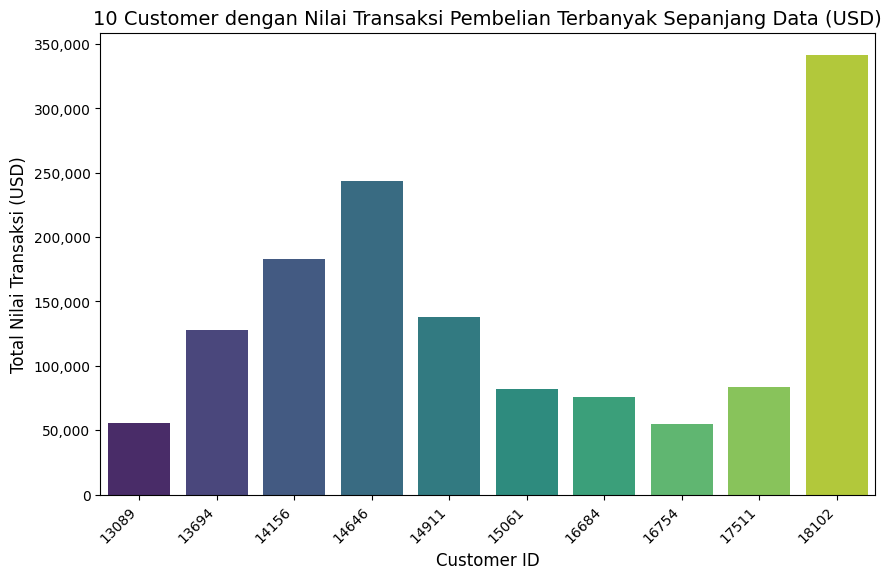

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Tahap 1: Buat format label sumbu y dengan thousand separator
def thousand_separator(x, _):
    return f'{int(x):,}'

# Tahap 2: Atur Ukuran Grafik
plt.figure(figsize=(10, 6))

# Tahap 3: Konversi format Customer ID menjadi integer (bilangan bulat) agar tidak ada .0 (angka desimal)
top_10_customers['Customer ID'] = top_10_customers['Customer ID'].astype(int)

# Tahap 4: Buat Bar Plot dan tukar sumbu x dan y
sns.barplot(x='Customer ID', y='TotalTransaction', data=top_10_customers, palette='viridis')

# Tahap 5: Setel judul dan label
plt.title("10 Customer dengan Nilai Transaksi Pembelian Terbanyak Sepanjang Data (USD)", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Nilai Transaksi (USD)", fontsize=12)

# Tahap 6: Putar sumbu x supaya pembacaan lebih mudah
plt.xticks(rotation=45, ha="right")

# Tahap 7: Pasang formatting thousand separator yang sudah dibuat di tahap 1
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousand_separator))

# Tahap 8: Munculkan Bar Plot
plt.show()


<ipython-input-16-10a3a49a4eed>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer ID', y='TotalTransactionIDR', data=top_10_customers, palette='viridis')


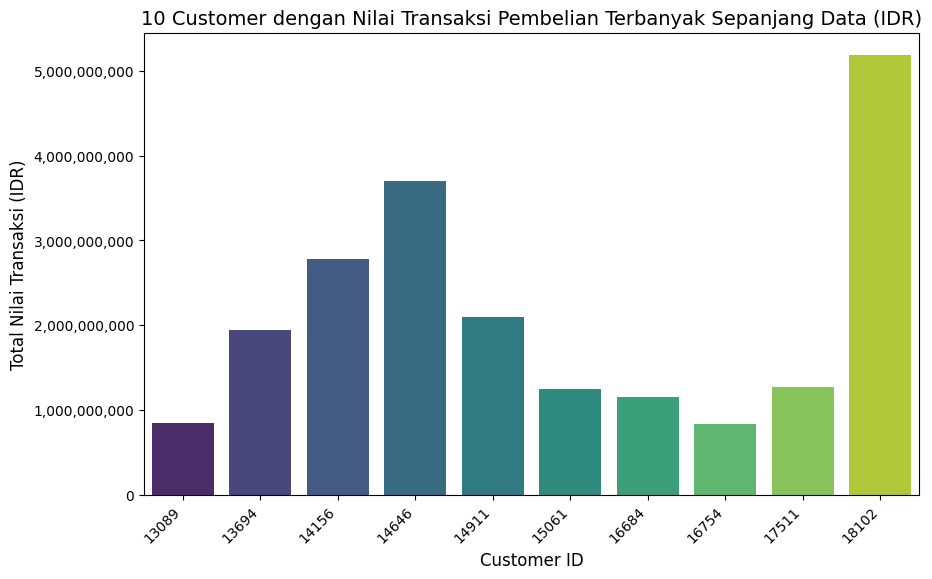

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Tahap 1: Buat format label sumbu y dengan thousand separator
def thousand_separator(x, _):
    return f'{int(x):,}'

# Tahap 2: Tentukan Exchange Rate (Asumsikan dari kurs tengah BI pada 24 September 2024: Rp 15191/USD)
exchange_rate = 15191

# Tahap 3: Buat kolom baru untuk total transaksi IDR
top_10_customers['TotalTransactionIDR'] = top_10_customers['TotalTransaction'] * exchange_rate

# Tahap 4: Atur Ukuran Grafik
plt.figure(figsize=(10, 6))

# Tahap 5: Konversi format Customer ID menjadi integer (bilangan bulat) agar tidak ada .0 (angka desimal)
top_10_customers['Customer ID'] = top_10_customers['Customer ID'].astype(int)

# Tahap 6: Buat Bar Plot dan tukar sumbu x dan y
sns.barplot(x='Customer ID', y='TotalTransactionIDR', data=top_10_customers, palette='viridis')

# Tahap 7: Setel judul dan label
plt.title("10 Customer dengan Nilai Transaksi Pembelian Terbanyak Sepanjang Data (IDR)", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Nilai Transaksi (IDR)", fontsize=12)

# Tahap 8: Putar sumbu x supaya pembacaan lebih mudah
plt.xticks(rotation=45, ha="right")

# Tahap 9: Pasang formatting thousand separator yang sudah dibuat di tahap 1
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousand_separator))

# Tahap 10: Munculkan Bar Plot
plt.show()


#**ALIT**

##10 Negara dengan penjualan tertinggi

In [ ]:
# Hapus baris dengan nilai NaN di kolom 'Country', 'Quantity', atau 'Price'
df = df.dropna(subset=['Country', 'Quantity', 'Price'])

# Hapus entri dengan Quantity atau Price <= 0
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Membuat kolom Total Penjualan (Quantity * Price)
df['TotalSales'] = df['Quantity'] * df['Price']

# Menampilkan data yang sudah dibersihkan
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total MonthYear  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom   83.4   2009-12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   81.0   2009-12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   81.0   2009-12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  100.8   2009-12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom   30.0   2009-12   

   TotalTransaction  TotalSales  
0              83.4        83.4  
1              81.0        81.0  
2       

In [ ]:
# Kelompokkan data berdasarkan negara dan hitung total penjualan
penjualan_per_negara = df.groupby('Country')['TotalSales'].sum()

# Urutkan data berdasarkan penjualan secara menurun
penjualan_per_negara_sorted = penjualan_per_negara.sort_values(ascending=False)

# Ambil 10 negara dengan penjualan tertinggi
top_10_negara = penjualan_per_negara_sorted.head(10)

# Menampilkan hasil
print(top_10_negara)

Country
United Kingdom    8846129.263
EIRE               380977.820
Netherlands        268786.000
Germany            202395.321
France             147211.490
Sweden              53525.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: TotalSales, dtype: float64


<ipython-input-19-b7368573232e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_negara.values, y=top_10_negara.index, palette='viridis')


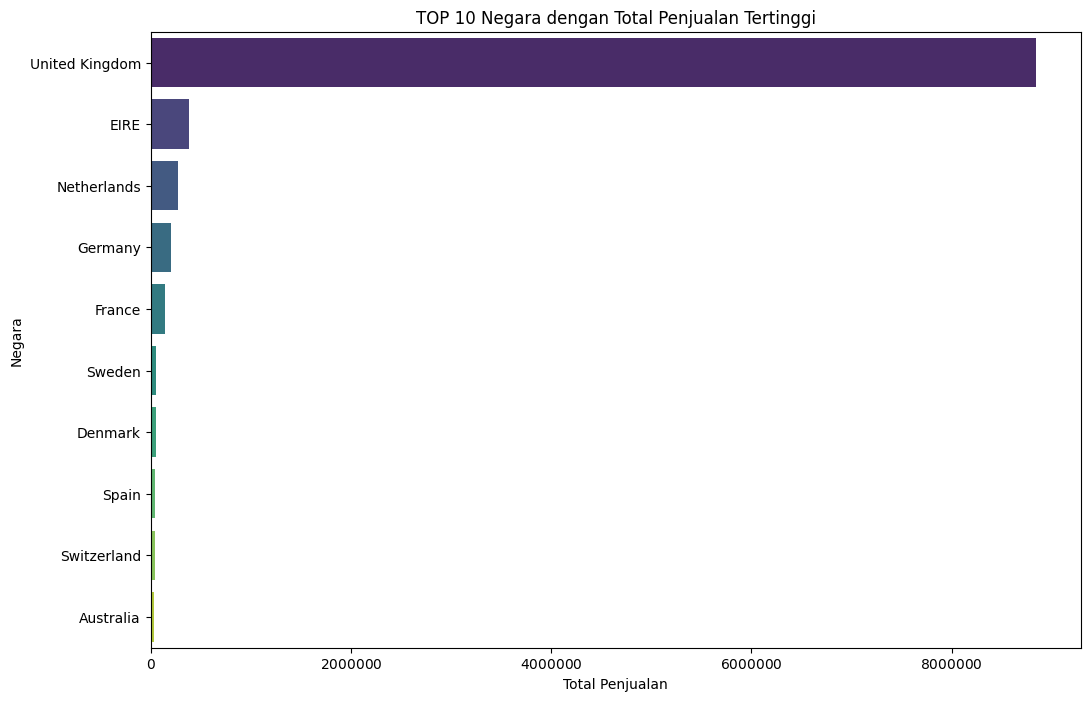

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Membuat figure dan ukuran plot
plt.figure(figsize=(12, 8))

# Membuat grafik batang menggunakan seaborn
sns.barplot(x=top_10_negara.values, y=top_10_negara.index, palette='viridis')

# Memberi judul pada grafik
plt.title("TOP 10 Negara dengan Total Penjualan Tertinggi")

# Memberi label pada sumbu x dan y
plt.xlabel('Total Penjualan')
plt.ylabel('Negara')

# Mengubah format angka pada sumbu x menjadi format biasa tanpa notasi ilmiah
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')

# Menampilkan grafik
plt.show()

#**ARIJAL**

## 10 Produk dengan penjualan tertinggi

In [ ]:
# Kelompokkan data berdasarkan StockCode dan jumlahkan quantity
data_grouped = df.groupby('StockCode')['Quantity'].sum().reset_index()

# Urutkan data berdasarkan quantity secara descending dan ambil 10 teratas
top_10_products = data_grouped.sort_values('Quantity', ascending=False).head(10)

top_10_products

,StockCode,Quantity
489,21212,60141
3796,85123A,58487
2332,84077,55091
3781,85099B,49875
50,17003,48374
2501,84879,45348
2542,84991,36502
1306,22197,32977
1120,21977,31940
506,21232,27127


In [ ]:
# Gabungkan kembali dengan data asli untuk mendapatkan deskripsi produk
top_10_products = pd.merge(top_10_products, df[['StockCode', 'Description']], on='StockCode')

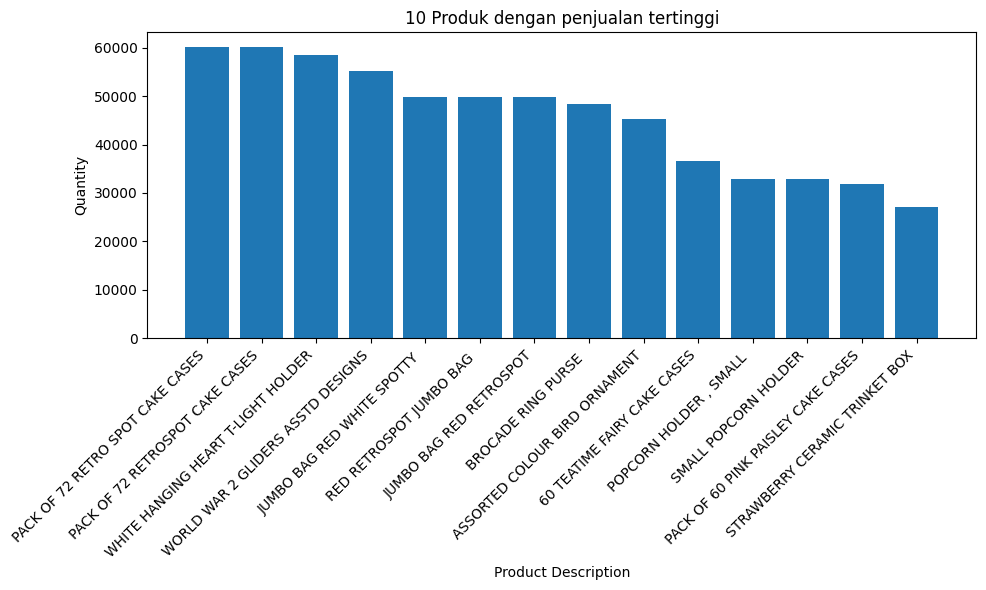

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['Description'], top_10_products['Quantity'])
plt.xlabel('Product Description')
plt.ylabel('Quantity')
plt.title('10 Produk dengan penjualan tertinggi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik Penjualan tahun ke tahun

In [ ]:
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib
from google.colab import drive

Using matplotlib backend: <object object at 0x7df7e3e4fb90>


#**KARIM**

Downloading...
From: https://drive.google.com/uc?id=1rCzzRlQ6TRIdxK6ysngcDl2KuuKkKML3
To: /content/online_retail_II.xlsx
100%|██████████| 45.6M/45.6M [00:00<00:00, 148MB/s]


Jumlah NaT di InvoiceDate: 0
Baris dengan InvoiceDate invalid:
Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []
       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG     

<ipython-input-3-701c188d6153>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total', data=annual_sales, palette='viridis')


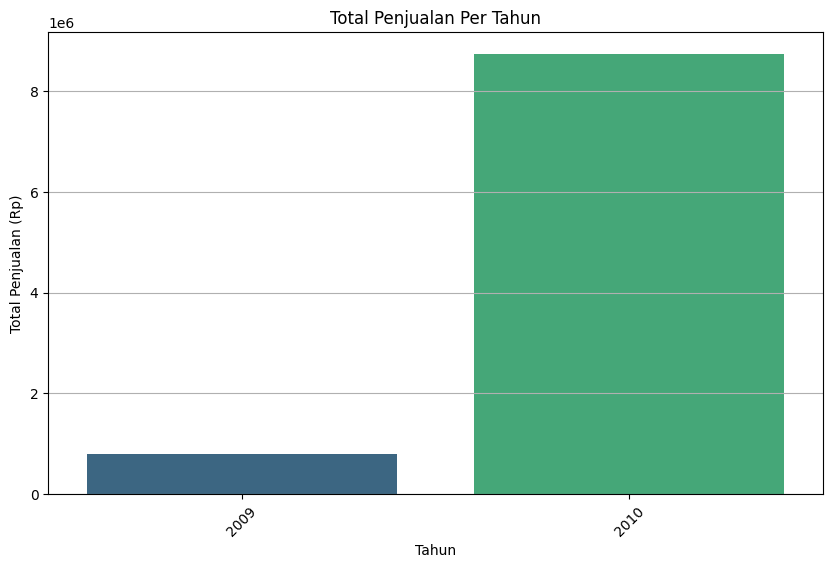

In [ ]:
import gdown
import pandas as pd
from openpyxl import load_workbook
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
file_id = "1rCzzRlQ6TRIdxK6ysngcDl2KuuKkKML3"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "online_retail_II.xlsx"
gdown.download(download_url, output_file, quiet=False)

file_path = 'online_retail_II.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')
# Mengubah InvoiceDate menjadi tipe datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')

# Cek nilai InvoiceDate
print("Jumlah NaT di InvoiceDate:", data['InvoiceDate'].isna().sum())
invalid_dates = data[data['InvoiceDate'].isna()]
print("Baris dengan InvoiceDate invalid:")
print(invalid_dates)

# Memastikan Price dan Quantity dalam format numerik
data['Price'] = pd.to_numeric(data['Price'].astype(str).str.replace(',', '.'), errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

# Menghitung total penjualan
#data['Total'] = data['Quantity'] * data['Price']
data['Total'] = data['Quantity'] * data['Price']

# Mengubah format tampilan angka
#pd.set_option('display.float_format', '{:.2f}'.format)  # Menampilkan dua desimal

# Mengelompokkan data berdasarkan tahun
data['Year'] = data['InvoiceDate'].dt.year

# Mengelompokkan total penjualan per tahun
annual_sales = data.groupby('Year')['Total'].sum().reset_index()

# Cek hasil pengelompokan
print (data)
print(annual_sales)

# Visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total', data=annual_sales, palette='viridis')
plt.title('Total Penjualan Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan (Rp)')
plt.xticks(rotation=45)  # Memutar label tahun jika perlu
plt.grid(axis='y')

# Menampilkan plot
plt.show()
